# Bike Rental Demand Forecast

##### Business Problem: The bike-sharing company is facing challenges in aligning its bike availability with fluctuating rental demand.
##### Inefficient distribution of bikes can lead to high customer wait times at popular stations or overstocking at less frequented locations.  
##### To enhance operational efficiency, the company seeks to predict bike rental demand with high accuracy. By forecasting demand, the company
##### can optimize bike distribution, ensure timely availability at high-demand locations, and reduce operational costs associated with imbalances 
##### in bike inventory. Ultimately, improved demand predictionscan lead to increased customer satisfaction and higher utilization rates.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# reading the file
train=pd.read_csv(r"C:\Users\Anik\Downloads\train.csv")
test=pd.read_csv(r"C:\Users\Anik\Downloads\test.csv")

In [7]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,20-01-2011 00:00,1,0,1,1,10.66,11.365,56,26.0027
1,20-01-2011 01:00,1,0,1,1,10.66,13.635,56,0.0000
2,20-01-2011 02:00,1,0,1,1,10.66,13.635,56,0.0000
3,20-01-2011 03:00,1,0,1,1,10.66,12.880,56,11.0014
4,20-01-2011 04:00,1,0,1,1,10.66,12.880,56,11.0014


In [11]:
#conberting Date time column as date time format
train['datetime'] = pd.to_datetime(train['datetime'], format="%d-%m-%Y %H:%M")
test['datetime'] = pd.to_datetime(test['datetime'], format="%d-%m-%Y %H:%M")

In [13]:
#Number of duplicates  
print("Total number of duplicates in train dataset >>",sum(train.duplicated()))
print("Total number of duplicates in test dataset >>",sum(test.duplicated()))

Total number of duplicates in train dataset >> 0
Total number of duplicates in test dataset >> 0


In [15]:
# shape of data points
print("Shape of Train Set : ",train.shape)
print("Shape of Test Set : ",test.shape)

Shape of Train Set :  (10886, 12)
Shape of Test Set :  (6493, 9)


In [17]:
# Lets Check the Missing Values : 

print("\nMissing Values Reported in Training Set: \n")
print(train.isnull().sum())
print("\nMissing Values Reported in Testing Set: \n")
print(test.isnull().sum())


Missing Values Reported in Training Set: 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Missing Values Reported in Testing Set: 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


In [19]:
#converting datetime column as hour , day of week , month and year
train['hour']=train['datetime'].dt.hour
train['day']=train['datetime'].dt.dayofweek
train['month']=train['datetime'].dt.month
train['year']=train['datetime'].dt.year
train['year'] = train['year'].map({2011:0, 2012:1})
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0


In [21]:
#converting datetime column as hour , day of week , month and year

test['hour']=test['datetime'].dt.hour
test['day']=test['datetime'].dt.dayofweek
test['month']=test['datetime'].dt.month
test['year']=test['datetime'].dt.year
test['year'] =test['year'].map({2011:0, 2012:1})
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,3,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,1,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,3,1,0


In [23]:
#drop datetime column
train=train.drop('datetime',axis=1)
test=test.drop('datetime',axis=1)

# EDA

In [26]:
print("Number of counts >")
print(train.groupby('holiday')['count'].mean())
print(train.groupby('workingday')['count'].mean())
print(train.groupby('weather')['count'].mean())
print(train.groupby('season')['count'].mean())

Number of counts >
holiday
0    191.741655
1    185.877814
Name: count, dtype: float64
workingday
0    188.506621
1    193.011873
Name: count, dtype: float64
weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64
season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64


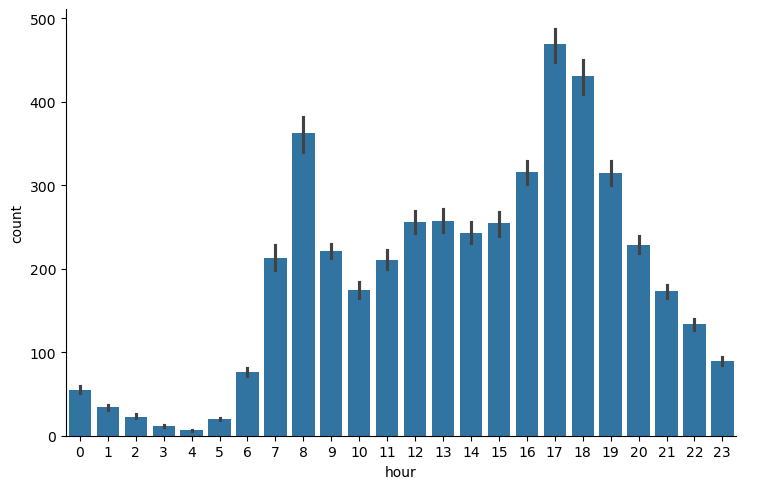

In [28]:
#see how count varies with hour
sns.catplot(x="hour", y="count", data=train, kind='bar', height=5, aspect=1.5)

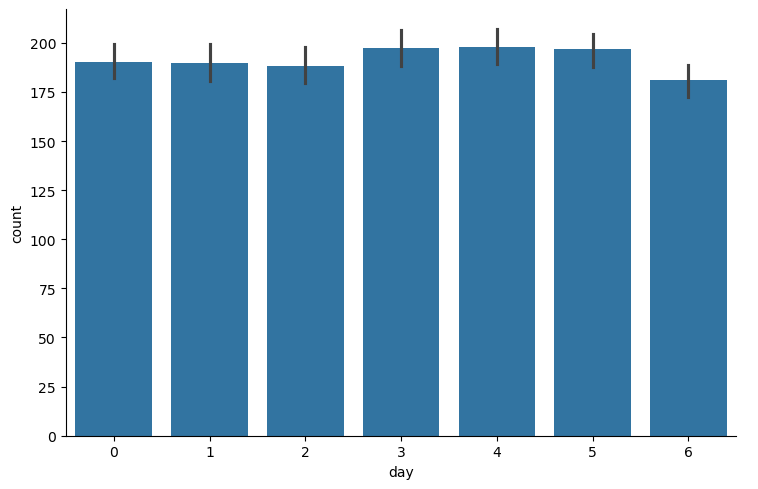

In [30]:
#see how count varies with day
sns.catplot(x="day", y="count", data=train, kind='bar', height=5, aspect=1.5)

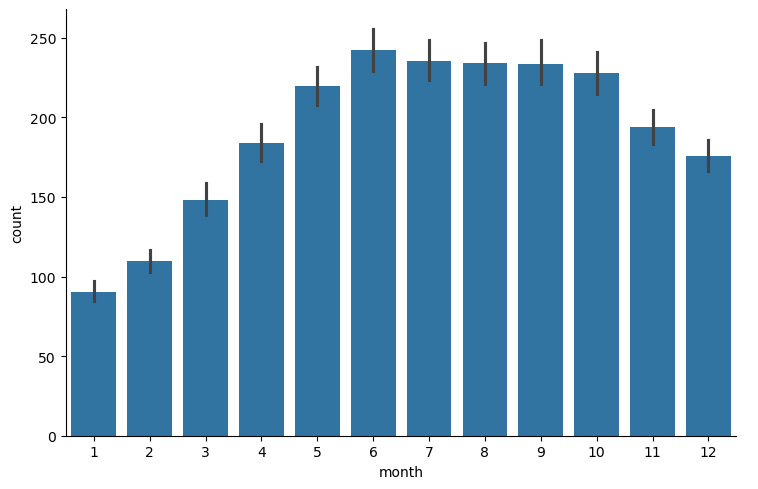

In [32]:
#see how count varies with month
sns.catplot(x="month", y="count", data=train, kind='bar', height=5, aspect=1.5)

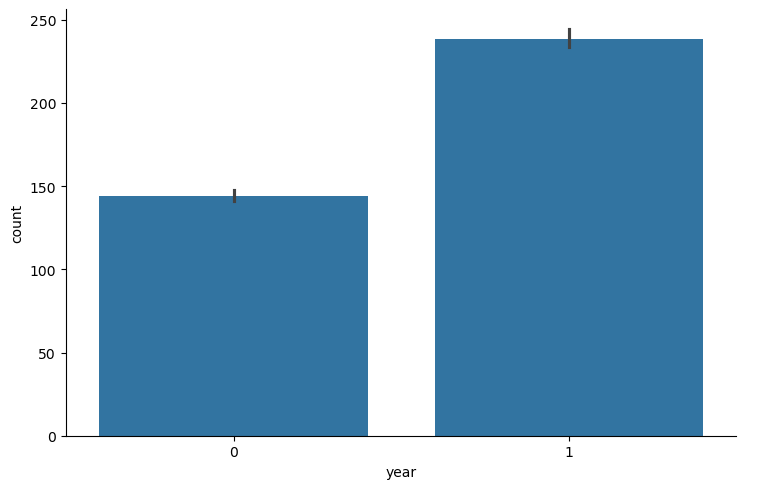

In [34]:
#see how count varies with year
sns.catplot(x="year", y="count", data=train, kind='bar', height=5, aspect=1.5)

<Axes: xlabel='weather', ylabel='count'>

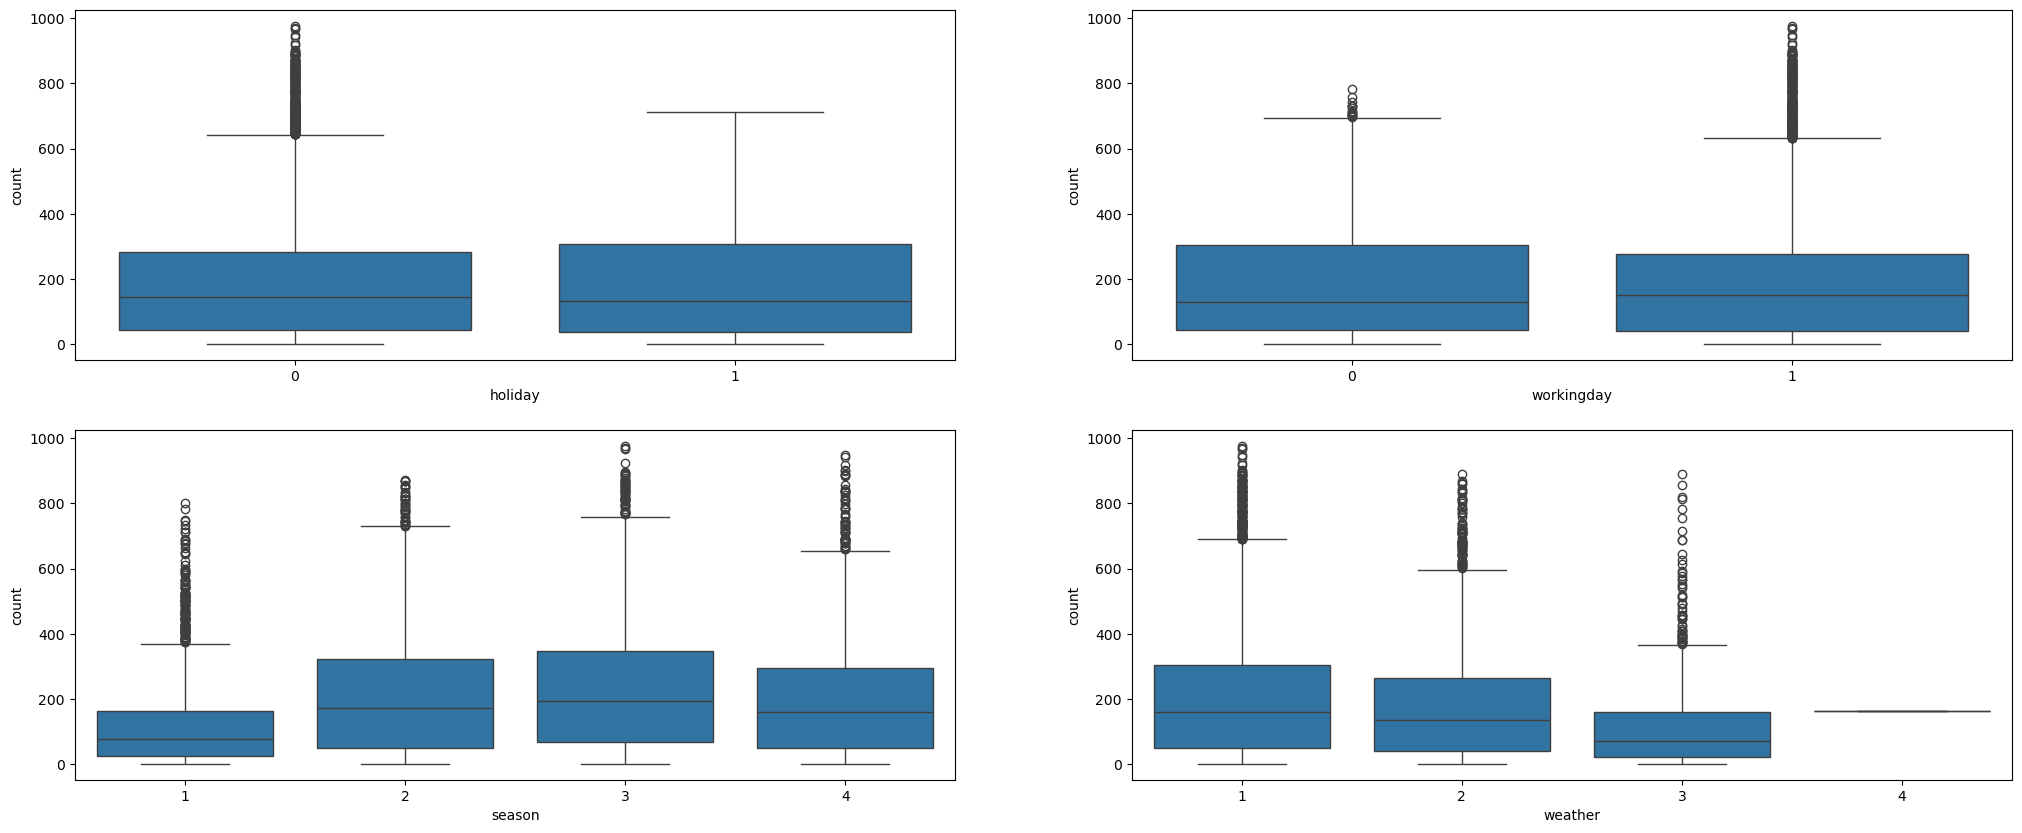

In [36]:
#Visulize how data distributed 
plt.figure(figsize=(25, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'holiday', y = 'count', data = train)
plt.subplot(2,2,2)
sns.boxplot(x = 'workingday', y = 'count', data = train)
plt.subplot(2,2,3)
sns.boxplot(x = 'season', y = 'count', data = train)
plt.subplot(2,2,4)
sns.boxplot(x = 'weather', y = 'count', data = train)

Text(0.5, 1.0, 'Correlation Heatmap')

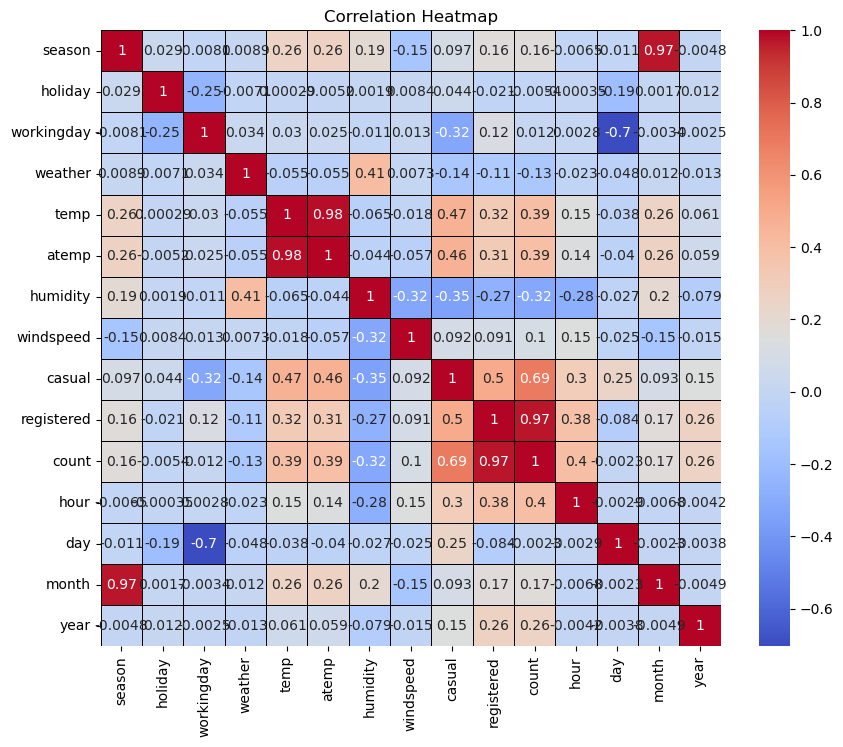

In [38]:
#finding the correlation 
c=train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(c, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title("Correlation Heatmap")

In [40]:
# Here temp and atemp are highly correlated and casual and registered are also highly correlated with count.
# We may choose to drop one of them  from temp and atemp and drop casual and registered depending on their contribution to the prediction model 

In [42]:
# Drop atemp , casual and registered as they are not that much important
train.drop(['atemp','casual','registered'],inplace=True,axis=1)

# Inferences and Insights from EDA

##### i) Average count is more while holiday is 0 , so at (holiday=0) demand is bit higer.

##### ii) Same as at (working=1) demand is higher than (working =0)

##### iii) Weather = 1 has higher demand than others

##### iv)season = 2 and 3 has more demand than other seasons

##### v) highest demand is in hours from say 7-10 and the from 15-19.As expected it's office time so more people would be renting bikes.

##### vi) month from 5 to 10 has more demand as all are wellig to renting bikes in summer.

##### vii) bike renting demand is increasing from 2011 to 2012

##### vii) There is so many outlier in our dataset , if we starting removing it, this can be difficult for us. Although we remove there is lots of information loss.

##### Viii)There are high correlation between temp and atemp, as atemp is the combinaion of temp. And casual and registered also has high correlation with count as because count is the sum of casual and registered 

##### ix) data also has missing rows, lots of hourly data are missing.

# model fitting

In [57]:
!pip install xgboost

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error

###  dividing the train data as train and validation data to check my model error

In [62]:
# split the training data to train and validation 
# Apporx 20 % data in validation set
train_x=train.iloc[0:8687]
x=train_x.drop('count',axis=1)
y=train_x['count']
#test data from train dtaset
test_x=train.iloc[8687:10887,]
x_t=test_x.drop('count',axis=1)
y_t=test_x['count']

In [64]:
#random forest
rnf=RandomForestRegressor().fit(x,y)
pred_rnf=rnf.predict(x_t)

In [66]:
mape_rnf=mean_absolute_percentage_error(y_t,pred_rnf)
mse_rnf=mean_squared_error(y_t,pred_rnf)
r2_rnf=r2_score(y_t,pred_rnf)
print(f'MSE:{mse_rnf}')
print(f"r2_score:{r2_rnf}")
print(f"MAPE:{mape_rnf}")

MSE:5184.508782372505
r2_score:0.8901612789525205
MAPE:0.26306585715816566


In [68]:
#linear REgression
lr=LinearRegression()
lr.fit(x,y)
pred_lr=lr.predict(x_t)

In [70]:
mape_lr=mean_absolute_percentage_error(y_t,pred_lr)
mse_lr=mean_squared_error(y_t,pred_lr)
r2_lr=r2_score(y_t,pred_lr)
print(f'MSE:{mse_lr}')
print(f"r2_score:{r2_lr}")
print(f"MAPE:{mape_lr}")

MSE:33574.3717113096
r2_score:0.28869518723134535
MAPE:3.5358410670877523


In [72]:
#Xgboost
xgb=XGBRegressor().fit(x,y)
pred_xgb=xgb.predict(x_t)

In [74]:
mape_xgb=mean_absolute_percentage_error(y_t,pred_xgb)
mse_xgb=mean_squared_error(y_t,pred_xgb)
r2_xgb=r2_score(y_t,pred_xgb)
print(f'MSE:{mse_xgb}')
print(f"r2_score:{r2_xgb}")
print(f"MAPE:{mape_xgb}")

MSE:4323.6177210059295
r2_score:0.9084000701497148
MAPE:0.4936691112720862


In [76]:
#Decision Tree
dt=DecisionTreeRegressor().fit(x,y)
pred_dt=dt.predict(x_t)

In [78]:
mape_dt=mean_absolute_percentage_error(y_t,pred_dt)
mse_dt=mean_squared_error(y_t,pred_dt)
r2_dt=r2_score(y_t,pred_dt)
print(f'MSE:{mse_dt}')
print(f"r2_score:{r2_dt}")
print(f"MAPE:{mape_dt}")

MSE:8106.761709868122
r2_score:0.828250587389088
MAPE:0.35808057084889544


In [80]:
df = pd.DataFrame({
    'Random Forest': pred_rnf,
    'XG boost': pred_xgb,
    'Decision Tree':pred_dt,
    'actual':y_t
})

#### we can't use XGBoost as a model because it's predicting negative counts which is not possible.

#### we also not use Linear Regression as our model because of high mean absolut percentage error.


#### I done Ensemble method for better prediction where I only use Random Forest And Decision Tree as model. 

In [87]:
#as random forest has  less mean absolute percentage error I weight .6 to random forest and .4 to decision three
ensemble=.6*df['Random Forest']+.4*df['Decision Tree']

In [89]:
mape_ens=mean_absolute_percentage_error(y_t,ensemble)
mse_ens=mean_squared_error(y_t,ensemble)
r2_ens=r2_score(y_t,ensemble)
print(f'MSE:{mse_ens}')
print(f"r2_score:{r2_ens}")
print(f"MAPE:{mape_ens}")

MSE:5540.523587229364
r2_score:0.8826187686625581
MAPE:0.2846332117337397


# By seeing the Mean absolute percentage error, R square and Mean square error I find that Ensemble Mehotod is the best fitted model .

# so I use Ensemble Method for Forecasting

## Forecasting the test data

In [94]:
#drop the atemp column form test data as we are not trainig our model with this column so it's useless
test=test.drop('atemp',axis=1)

In [96]:
# First forecast my data by Random Forest , decision tree and Ensemble Mehtod
forecast_rnf=rnf.predict(test)
forecast_dt=dt.predict(test)
forecast_ens=.6*forecast_rnf+.4*forecast_dt

In [98]:
# here my forecast count
forecast_ens

array([ 13.09 ,   7.944,   2.95 , ..., 125.97 , 114.146,  49.942])

In [100]:
df=pd.DataFrame({
    'Forecast Count':forecast_ens
})

In [209]:
df.to_csv('forecast.csv',index=False)